In [2]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()


In [4]:
x_train.shape # 5000 images in a 3d array 32,32,3

(50000, 32, 32, 3)

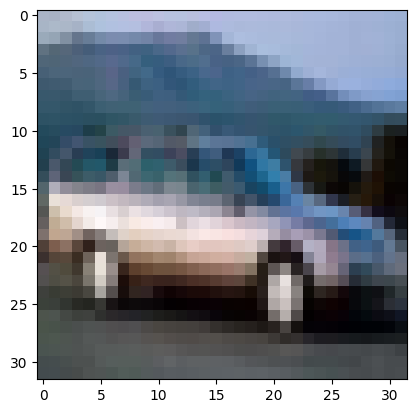

In [8]:
plt.imshow(x_train[4]) # to see the images in the network 

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
x_train = x_train/255
x_test = x_test/255

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3034 - loss: 1.9323
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4186 - loss: 1.6543
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4501 - loss: 1.5523
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4742 - loss: 1.4911
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4921 - loss: 1.4368


In [16]:
ann.evaluate(x_test,y_test)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print ("classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4719 - loss: 1.4884
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.38      0.74      0.50      1000
           1       0.69      0.49      0.57      1000
           2       0.44      0.24      0.31      1000
           3       0.31      0.43      0.36      1000
           4       0.45      0.39      0.42      1000
           5       0.35      0.40      0.37      1000
           6       0.53      0.51      0.52      1000
           7       0.62      0.47      0.54      1000
           8       0.55      0.57      0.56      1000
           9       0.67      0.41      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [17]:
# making a cnn
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters = 32, activation = 'relu',kernel_size = (3,3),input_shape=(32, 32, 3)),# kernelsize gives you filter size 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, activation = 'relu',kernel_size = (3,3),input_shape=(32, 32, 3)),# kernelsize gives you filter size 
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')  # softmax normalizes probabilities
])


c:\Users\devth\Documents\VScode_files\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\devth\Documents\VScode_files\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
cnn.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7253 - loss: 0.7876
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7491 - loss: 0.7231
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7613 - loss: 0.6907
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7773 - loss: 0.6448
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7865 - loss: 0.6136
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8005 - loss: 0.5743
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8119 - loss: 0.5416
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8199 - loss: 0.5193
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8327 - loss: 0.4791
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8442 - loss: 0.4494


In [21]:
cnn.evaluate(x_test,y_test)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print ("classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7011 - loss: 1.0073
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.84      0.77      0.80      1000
           2       0.55      0.66      0.60      1000
           3       0.55      0.49      0.52      1000
           4       0.72      0.54      0.62      1000
           5       0.66      0.55      0.60      1000
           6       0.74      0.79      0.76      1000
           7       0.70      0.78      0.74      1000
           8       0.77      0.82      0.80      1000
           9       0.71      0.81      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

